## 📊 Statistical modeling and insightful interpretation of customer churn in a fictitious telecom company, transforming data into actionable business insights.

#### 1. Project Libraries - import 📦

This section lists all the Python libraries used in this project. Keeping them organized here helps with reproducibility and makes it easier to install dependencies.

In [1]:
# Install the watermark package
%pip install -q -U watermark
# Install essential Python libraries for data analysis, statistics, and visualization
%pip install pandas numpy statsmodels seaborn matplotlib plotly IPython -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports for data analysis, statistical modeling, and visualization

# pandas: for handling and manipulating tabular data (DataFrames)
import pandas as pd  

# numpy: for numerical computations, arrays, and mathematical operations
import numpy as np  

# statsmodels.api: for statistical modeling and inference
# e.g., logistic regression, linear regression, hypothesis testing
import statsmodels.api as sm  

# seaborn: high-level statistical data visualization (built on matplotlib)
import seaborn as sns  

# matplotlib.pyplot: core plotting library for creating static plots
import matplotlib.pyplot as plt  

# plotly.express: easy-to-use API for interactive, high-level visualizations
import plotly.express as px  

# plotly.graph_objects: more detailed, customizable interactive plots
import plotly.graph_objects as go

# IPython.display: utilities for displaying rich content in notebooks
# e.g., Markdown, HTML, images
from IPython.display import display, Markdown  


In [3]:
# Configuration for better display of numerical values in pandas DataFrames
# This sets the float format to always show 4 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
# Reload the watermark extension (useful if you modified or installed it during the session)
%reload_ext watermark  

# Display notebook metadata
%watermark -a "Mayk Analyst" 

Author: Mayk Analyst



In [5]:
# Display the versions of installed Python packages in the current environment
# This is useful for reproducibility
# --iversions shows versions of all imported modules in the current notebook session
%watermark --iversions

IPython    : 9.9.0
matplotlib : 3.10.8
numpy      : 2.4.1
pandas     : 2.3.3
plotly     : 6.5.2
seaborn    : 0.13.2
statsmodels: 0.14.6



#### 2. Defining the Business Problem

#### 📌 2.1 Business Problem

**Connecta Telecom**, a fictional telecommunications company, is facing a **high service cancellation rate (churn)**, above the industry average.  

Customer loss not only impacts **recurring revenue** but also generates **high acquisition costs** to replace lost clients.

The board needs **clear, data-driven answers** to the question:  
> **"What are the main factors that lead our customers to cancel their service?"**

🔹 We want to **understand relationships between variables** → *Statistical Modeling*  
🔹 We want to **predict churn** → *Predictive Modeling*

---

#### 🎯 2.2 Project Objectives

This project uses **statistical modeling** to analyze customer data with the following goals:

1. **Identify Key Factors**  
   Determine which variables (ex: contract type, loyalty period, invoice value) **significantly influence churn**.

2. **Quantify Impact**  
   Measure how strong the influence of each factor is on the **risk of churn**.

3. **Generate Recommendations**  
   Translate statistical results into **actionable business strategies** for **customer retention**.

The chosen model for this analysis is **Logistic Regression**, since our goal is to understand the relationship between multiple variables and a **binary outcome (Churn: Yes / No)**.


#### 3. Data extraction

In [6]:
# NOTE:
# This synthetic dataset generator was created with the assistance of ChatGPT
# for educational and portfolio purposes.

# Function to generate realistic synthetic data for churn analysis
def generate_churn_data(num_customers=2000):
    
    """
    Generates a DataFrame with synthetic customer data for a telecommunications
    company, designed for churn analysis.
    """

    # For reproducibility
    np.random.seed(42)

    # Main variables
    tenure_months = np.random.randint(1, 73, size=num_customers)

    contract_type_options = ['Monthly', 'Annual', 'Two years']
    contract_probs = [0.6, 0.25, 0.15]
    contract_type = np.random.choice(
        contract_type_options, size=num_customers, p=contract_probs
    )

    internet_service_options = ['Fiber Optic', 'DSL', 'No']
    internet_probs = [0.55, 0.35, 0.10]
    internet_service = np.random.choice(
        internet_service_options, size=num_customers, p=internet_probs
    )

    # Base monthly charge by contract type
    base_charge = {
        'Monthly': np.random.normal(60, 20),
        'Annual': np.random.normal(70, 25),
        'Two years': np.random.normal(80, 25)
    }

    monthly_charge = [
        base_charge[c] + tenure_months[i] * 0.2 + np.random.normal(0, 5)
        for i, c in enumerate(contract_type)
    ]
    monthly_charge = np.clip(monthly_charge, 20, 120)

    # Logic for churn probability
    churn_log_odds = -2.5  # base intercept
    churn_log_odds += -0.05 * tenure_months
    churn_log_odds += [
        3.0 if c == 'Monthly' else -1.5 if c == 'Annual' else -2.5
        for c in contract_type
    ]
    churn_log_odds += [
        0.8 if s == 'Fiber Optic' else -0.5
        for s in internet_service
    ]
    churn_log_odds += 0.03 * monthly_charge

    # Convert log-odds to probability using the sigmoid function
    churn_probability = 1 / (1 + np.exp(-churn_log_odds))

    # Generate churn outcome based on probability
    churn = np.random.binomial(1, churn_probability)

    df = pd.DataFrame({
        'Customer_ID': range(1, num_customers + 1),
        'Tenure_Months': tenure_months,
        'Contract_Type': contract_type,
        'Internet_Service': internet_service,
        'Monthly_Charge': monthly_charge,
        'Churn': churn
    })

    return df

# CREATED BY AI

In [7]:
# Generate the data
df_churn = generate_churn_data()

In [8]:
df = df_churn.copy()  # Create a copy of df_churn to work on without altering the original dataset

##### Sample of Generated Data

In [9]:
df.head(15)  # Preview first 15 rows of the dataset

,Customer_ID,Tenure_Months,Contract_Type,Internet_Service,Monthly_Charge,Churn
0,1,52,Annual,Fiber Optic,36.5724,0
1,2,15,Two years,Fiber Optic,45.2871,0
2,3,72,Monthly,Fiber Optic,101.0033,1
3,4,61,Monthly,Fiber Optic,103.3314,1
4,5,21,Monthly,DSL,94.0969,1
5,6,24,Monthly,Fiber Optic,90.8386,1
6,7,3,Annual,DSL,40.6962,0
7,8,22,Monthly,Fiber Optic,94.2332,1
8,9,53,Monthly,Fiber Optic,99.8818,1
9,10,2,Monthly,Fiber Optic,92.0349,1


In [10]:
df.tail(15)  # Preview last 15 rows of the dataset

,Customer_ID,Tenure_Months,Contract_Type,Internet_Service,Monthly_Charge,Churn
1985,1986,14,Two years,DSL,37.4959,0
1986,1987,71,Annual,DSL,51.0499,0
1987,1988,5,Annual,DSL,39.7251,0
1988,1989,55,Monthly,No,98.1660,1
1989,1990,2,Monthly,Fiber Optic,92.7292,1
1990,1991,62,Monthly,DSL,108.2627,0
1991,1992,21,Annual,DSL,38.9264,0
1992,1993,21,Monthly,No,95.0111,1
1993,1994,10,Monthly,No,94.8894,1
1994,1995,58,Two years,DSL,51.2981,0


#### 4. Exploratory Data Analysis (EDA)
##### General DataFrame Information

In [11]:
df.info()  # Shows summary of the DataFrame: column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       2000 non-null   int64  
 1   Tenure_Months     2000 non-null   int32  
 2   Contract_Type     2000 non-null   object 
 3   Internet_Service  2000 non-null   object 
 4   Monthly_Charge    2000 non-null   float64
 5   Churn             2000 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 78.3+ KB


In [12]:
df.describe(include="object")  # Show summary statistics for all object (categorical/text) columns

,Contract_Type,Internet_Service
count,2000,2000
unique,3,3
top,Monthly,Fiber Optic
freq,1186,1114


In [13]:
df.describe(include="number") # Displays summary statistics for all numeric columns

,Customer_ID,Tenure_Months,Monthly_Charge,Churn
count,2000.0000,2000.0000,2000.0000,2000.0000
mean,1000.5000,35.6825,75.3201,0.4905
std,577.4946,20.8430,27.5079,0.5000
min,1.0000,1.0000,24.9216,0.0000
25%,500.7500,17.0000,45.0201,0.0000
50%,1000.5000,35.0000,90.6543,0.0000
75%,1500.2500,54.0000,98.5286,1.0000
max,2000.0000,72.0000,119.2712,1.0000


In [14]:
df.describe(include="all")  # Show summary statistics for all columns, including counts, unique values, and basic stats

,Customer_ID,Tenure_Months,Contract_Type,Internet_Service,Monthly_Charge,Churn
count,2000.0000,2000.0000,2000,2000,2000.0000,2000.0000
unique,NaN,NaN,3,3,NaN,NaN
top,NaN,NaN,Monthly,Fiber Optic,NaN,NaN
freq,NaN,NaN,1186,1114,NaN,NaN
mean,1000.5000,35.6825,NaN,NaN,75.3201,0.4905
std,577.4946,20.8430,NaN,NaN,27.5079,0.5000
min,1.0000,1.0000,NaN,NaN,24.9216,0.0000
25%,500.7500,17.0000,NaN,NaN,45.0201,0.0000
50%,1000.5000,35.0000,NaN,NaN,90.6543,0.0000
75%,1500.2500,54.0000,NaN,NaN,98.5286,1.0000


#### 4.1. Overall Churn Rate Chart

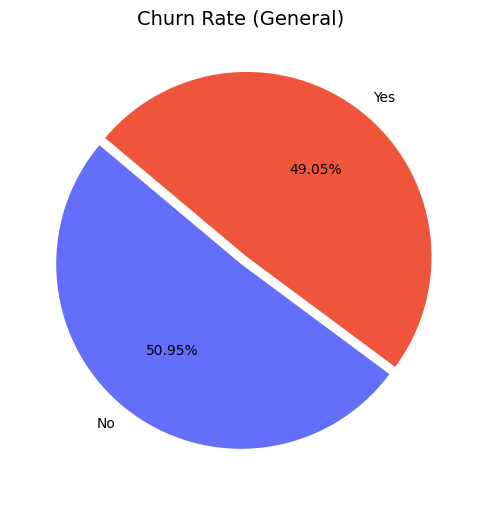

In [15]:
# Count values in the 'Churn' column
churn_counts = df['Churn'].value_counts().rename(index={1: 'Yes', 0: 'No'})

# Define colors
colors = ['#636EFA', '#EF553B']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.2f%%',  # two decimal places
    startangle=140,
    colors=colors,
    explode=[0.05 if label == 'Yes' else 0 for label in churn_counts.index]
)

plt.title('Churn Rate (General)', fontsize=14)
plt.show()

In [16]:
# Calculate counts
churn_counts = df['Churn'].value_counts()

# Map labels
labels = churn_counts.index.map({1: 'Yes', 0: 'No'})

# Create interactive pie chart
fig_pie = px.pie(
    values=churn_counts.values,
    names=labels,
    title='Overall Churn Rate',
    color=labels,
    color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'}
)

fig_pie.show()

In [18]:
# We calculate the churn rate
churn_counts = df['Churn'].value_counts()
numerator = churn_counts.get(1, churn_counts.get('Yes', churn_counts.get(True, 0)))
rate = 100 * numerator / len(df_churn)
print(f"The overall churn rate in our database is {rate:.2f}%. This is our main indicator to be analyzed.")

The overall churn rate in our database is 49.05%. This is our main indicator to be analyzed.


#### 4.2. Churn Rate Chart By Contract Type

Insight: The visualization is clear, **monthly contract** customers have a drastically higher propensity to churn compared to annual or two-year contract customers.

In [ ]:
# Chart - Interactive Version
# Histogram
fig_bar_contract = px.histogram(df_churn, 
x = 'Contract_Type', 
color = 'Churn', 
barmode = 'group', 
title = 'Churn Rate by Contract Type', 
labels = {'Contract_Type': 'Contract Type', 'Churn': 'Churn (0=No, 1=Yes)'})
fig_bar_contract.show()

#### 4.3. Loyalty Distribution Chart (in Months) By Churn

In [29]:
# Chart - Interactive Version

# Fidelity Analysis (Tenure)
fig_hist_fidelity = px.histogram(df, 
x = 'Tenure_Months', 
color = 'Churn', 
marginal = 'box', 
title = 'Loyalty Distribution (in Months) By Churn', 
labels = {'Loyalty_Months': 'Loyalty Months'})
fig_hist_fidelity.show()

_Insight:_ **Customers who cancel the service (`Churn=1`) are more concentrated in the first months of the contract. The median loyalty for customers who cancel is much lower than for those who remain. This indicates that the beginning of the customer journey is a critical period for retention.**

#### 4.4. Monthly Invoice Distribution Chart By Churn

In [30]:
# Chart - Interactive Version
# Analysis by Monthly Invoice
fig_hist_fatura = px.histogram(df, 
x = 'Monthly_Charge', 
color = 'Churn', 
marginal = 'box', 
title = 'Monthly Invoice Distribution By Churn', 
labels = {'Monthly_Invoice': 'Monthly Invoice Amount'})
fig_hist_fatura.show()

_Insight_: **Customers with higher monthly bills tend to have a higher churn rate. The median invoice value for customers who canceled is notably higher.**